In [1]:
# Libraries

import os
import platform
import sys

In [2]:
# Ensure source path

ROOT = os.getcwd()

while not ROOT.endswith('upolanc-thesis') :
	ROOT = os.path.abspath(os.path.join(ROOT, os.pardir))

	if len(ROOT) < len('upolanc-thesis') :
		if   platform.system() == 'Linux' :
			ROOT = '/d/hpc/home/up4472/workspace/upolanc-thesis'
		elif platform.system() == 'Windows' :
			ROOT = 'C:\\Developer\\Workspace\\PyCharm\\Projects\\upolanc-thesis'
		else :
			raise ValueError()

		print(f'Warning : could not find correct directory, using default : {ROOT}')
		break

if ROOT not in sys.path :
	sys.path.append(ROOT)

os.chdir(ROOT)

In [3]:
# Code

from source.python.report import report_load
from source.python.report import report_concat
from source.python.report import report_filter
from source.python.report import report_plot
from source.python.io     import loader
from source.python.io     import writer
from source.python        import runtime

runtime.set_numpy_format()
runtime.set_pandas_format()
runtime.set_plot_theme()

In [4]:
# List reports folder content

ROOT_DIR = os.path.join(ROOT, 'reports', 'final')

for index, name in enumerate(os.listdir(ROOT_DIR), start = 0) :
	path_l0 = os.path.join(ROOT_DIR, name)

	if index == 0 : print('{} :'.format(path_l0))
	else          : print('\n{} :'.format(path_l0))

	for name in os.listdir(path_l0) :
		path_l1 = os.path.join(path_l0, name)

		if not os.path.exists(path_l1) :
			continue

		for name in os.listdir(path_l1) :
			print('...\\{}'.format(name))

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\bert :
...\fc3-cat-12-3-72-promoter-adam-f2-0250-global-mean
...\fc3-def-12-3-72-promoter-adam-f2-0250-global-mean
...\fc3-rnn-12-3-72-promoter-adam-f2-0250-global-mean

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\cnn :

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\tune :
...\washburn-promoter-f2-2000-25-72-global-mean
...\washburn-transcript-f1-1000-25-72-global-mean
...\washburn-transcript-f2-1000-25-72-global-mean
...\zrimec-promoter-f1-2000-25-72-global-mean
...\zrimec-promoter-f2-2000-25-72-global-mean
...\zrimec-transcript-f1-1000-25-72-global-mean
...\zrimec-transcript-f2-1000-25-72-global-mean
...\zrimec-transcript-f5-1000-25-72-global-mean
...\72-1000-50


In [5]:
# Load existing configurations

CONFIG_DIR = os.path.join(ROOT, 'resources', 'tuner')

ZCONFIG_PATH = os.path.join(CONFIG_DIR, 'zrimec2020.json')
WCONFIG_PATH = os.path.join(CONFIG_DIR, 'washburn2019.json')

ZCONFIG = list()
WCONFIG = list()

CONFIG_MAX       = 25
CONFIG_BEST      = 3
CONFIG_OVERWRITE = True

if os.path.exists(ZCONFIG_PATH) and not CONFIG_OVERWRITE :
	ZCONFIG = loader.load_json(filename = ZCONFIG_PATH)

	print('Sucessufully loaded configuration [{:84s}] with [{:2d}] elements'.format(ZCONFIG_PATH, len(ZCONFIG)))

if os.path.exists(WCONFIG_PATH) and not CONFIG_OVERWRITE :
	WCONFIG = loader.load_json(filename = WCONFIG_PATH)

	print('Sucessufully loader configuration [{:84s}] with [{:2d}] elements'.format(WCONFIG_PATH, len(WCONFIG)))

# 1. CNN

## 1.1 Model

In [6]:
# Load cnn model reports

report_cnn_model = report_load.load_cnn_reports(
	root = ROOT_DIR
)

### 1.1.1 Regression

In [7]:
# Display model performance for regression

if len(report_cnn_model['regression']) > 0 :
	report_cnn_model['regression']

### 1.1.2 Classification

In [8]:
# Display model performance for classification

if len(report_cnn_model['classification']) > 0 :
	report_cnn_model['classification']

## 1.2 Tune Model

In [9]:
# Load tune model reports

report_tune_model = report_load.load_cnn_tune_reports(
	root = ROOT_DIR,
	show = False,
	n    = 5
)

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\tune\cnn-regression\zrimec-promoter-f1-2000-25-72-global-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\tune\cnn-regression\zrimec-promoter-f2-2000-25-72-global-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\tune\cnn-regression\zrimec-transcript-f1-1000-25-72-global-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\tune\cnn-regression\zrimec-transcript-f2-1000-25-72-global-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\tune\cnn-regression\zrimec-transcript-f5-1000-25-72-global-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\tune\cnn-regression\washburn-promoter-f2-2000-25-72-global-mean\report.csv
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\tune\cnn-regression\washburn-transcript-f1-1000-25-72-global-mean\repor

### 1.2.1 Regression

In [10]:
# Display overall regression prediction

R2_THRESHOLD = 0.00

for key, dataframe in report_tune_model['regression'].items() :
	nan_mse = dataframe['valid_loss'].isnull().values.ravel().sum()
	pos_r2  = dataframe[dataframe['valid_r2'] > R2_THRESHOLD]['valid_r2'].count()
	neg_r2  = dataframe[dataframe['valid_r2'] < R2_THRESHOLD]['valid_r2'].count()

	print('{:64s} : Size = {:4d} || NaN Loss = {:4d} || Pos R2 = {:4d} || Neg R2 = {:4d}'.format(key, len(dataframe), nan_mse, pos_r2, neg_r2))

zrimec-promoter-f1-2000-25-72-global-mean                        : Size = 2000 || NaN Loss =    0 || Pos R2 = 1239 || Neg R2 =  761
zrimec-promoter-f2-2000-25-72-global-mean                        : Size = 2000 || NaN Loss =    0 || Pos R2 = 1300 || Neg R2 =  700
zrimec-transcript-f1-1000-25-72-global-mean                      : Size = 1000 || NaN Loss =    0 || Pos R2 =  318 || Neg R2 =  682
zrimec-transcript-f2-1000-25-72-global-mean                      : Size = 1000 || NaN Loss =    0 || Pos R2 =  505 || Neg R2 =  495
zrimec-transcript-f5-1000-25-72-global-mean                      : Size = 1000 || NaN Loss =    0 || Pos R2 =  589 || Neg R2 =  411
washburn-promoter-f2-2000-25-72-global-mean                      : Size = 2000 || NaN Loss =    0 || Pos R2 = 1635 || Neg R2 =  365
washburn-transcript-f1-1000-25-72-global-mean                    : Size = 1000 || NaN Loss =    0 || Pos R2 =  701 || Neg R2 =  299
washburn-transcript-f2-1000-25-72-global-mean                    : Size = 10

In [11]:
# Concat reports and display top few

report = report_concat.concat_cnn_tune_reports(
	reports = report_tune_model,
	mode    = 'regression',
	n       = None
)

if report is not None :
	report = report[report['Model'] == 'zrimec']
	# report = report[report['Filter'] == 'f1']
	report = report[report['Sequence'] == 'transcript']
	report = report.head(n = 25)

report

,Model,Sequence,Filter,Target0,Target1,Target2,ID,Valid_MSE,Valid_MAE,Valid_R2,Train_MSE,Epoch,Optimizer,Learning_Rate,Decay,Scheduler,Batch_Size,Dropout
697,zrimec,transcript,f2,global,mean,None,e721e6f2,0.567061607,0.602897315,0.292443600,0.527124019,25,adam,0.002154808,0.015899035,exponential,64,0.114
716,zrimec,transcript,f2,global,mean,None,a541fe53,0.568371480,0.599843251,0.291890400,0.538499647,25,adam,0.004099635,0.009608894,exponential,64,0.110
724,zrimec,transcript,f2,global,mean,None,e95c6ef8,0.570971189,0.604620621,0.291423020,0.580472189,25,adam,0.003870717,0.019056038,exponential,64,0.101
931,zrimec,transcript,f2,global,mean,None,d653ec8b,0.578601563,0.616288399,0.283562930,0.580331957,25,adam,0.004266882,0.013506303,exponential,64,0.149
1050,zrimec,transcript,f2,global,mean,None,cd205855,0.576439250,0.609679237,0.278954540,0.539379357,25,adam,0.003207174,0.011672562,exponential,64,0.120
1112,zrimec,transcript,f5,global,mean,None,11a4710a,0.631462432,0.648882901,0.276832220,0.589976245,25,adam,0.000957576,0.033269297,linear,64,0.145
1195,zrimec,transcript,f2,global,mean,None,d7518d16,0.583288527,0.608903614,0.274210500,0.568402525,25,adam,0.003630231,0.015889494,exponential,64,0.066
1198,zrimec,transcript,f5,global,mean,None,0266d24c,0.628342896,0.646142147,0.274056550,0.532670270,25,adam,0.001963162,0.023274301,exponential,64,0.091
1267,zrimec,transcript,f2,global,mean,None,de076990,0.585285171,0.610207815,0.271498380,0.565409913,25,adam,0.005087882,0.009986196,exponential,64,0.065
1269,zrimec,transcript,f5,global,mean,None,2db8d36c,0.630854073,0.646133101,0.271423220,0.578594776,25,adam,0.001502606,0.027914379,linear,64,0.078


In [12]:
# Save top model configurations (to same format as model params)

for key in report_tune_model['regression'].keys() :
	df = report_tune_model['regression'][key]
	df = df.sort_values('valid_r2', ascending = False)

	if   key.startswith('zrimec')   : config = ZCONFIG
	elif key.startswith('washburn') : config = WCONFIG
	else : raise ValueError()

	if   key.startswith('zrimec')   : layers = [3, 3]
	elif key.startswith('washburn') : layers = [6, 3]
	else : raise ValueError()

	for i in range(CONFIG_BEST) :
		item = dict()

		for k, v in df.iloc[i, :].to_dict().items() :
			if   k.startswith('valid')  : pass
			elif k.startswith('train')  : pass
			elif k.startswith('config') : k = k[7:]
			else : continue

			if k.startswith('model/convx/') :
				for i in range(2, layers[0] + 1) :
					oldkey = 'x/'
					newkey = str(i) + '/'

					item[k.replace(oldkey, newkey)] = v

			elif k.startswith('model/maxpoolx/') :
				for i in range(1, layers[1] + 1) :
					oldkey = 'x/'
					newkey = str(i) + '/'

					item[k.replace(oldkey, newkey)] = v

			else :
				item[k] = v

		config.append(item)

ZCONFIG = sorted(ZCONFIG, key = lambda x : x['valid_r2'], reverse = True)
WCONFIG = sorted(WCONFIG, key = lambda x : x['valid_r2'], reverse = True)

ZCONFIG = ZCONFIG[:CONFIG_MAX]
WCONFIG = WCONFIG[:CONFIG_MAX]

writer.write_json(
	filename = ZCONFIG_PATH,
	data     = ZCONFIG
)

writer.write_json(
	filename = WCONFIG_PATH,
	data     = WCONFIG
)

### 1.2.2 Classification

In [13]:
# Concat reports and display top few

report = report_concat.concat_cnn_tune_reports(
	reports = report_tune_model,
	mode    = 'classification',
	n       = None
)

report

## 1.3 Tune Data

In [14]:
# Display top few results for each tune configuration

report_tune_data = report_load.load_data_tune_reports(
	root = ROOT_DIR,
	show = False,
	n    = 25
)

### 1.3.1 Regression

In [15]:
# Concat reports and display top few

report = report_concat.concat_data_tune_reports(
	reports = report_tune_data,
	mode    = 'regression',
	n       = 25
)

report

### 1.3.1 Classification

In [16]:
# Concat reports and display top few

report = report_concat.concat_data_tune_reports(
	reports = report_tune_data,
	mode    = 'classification',
	n       = 25
)

report

## 1.4 Tune Feature

In [17]:
# Display top few results for each tune configuration

report_tune_feature = report_load.load_feature_tune_reports(
	root = ROOT_DIR,
	show = False,
	n    = 25
)

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\tune\feature-regression\72-1000-50\report.csv


### 1.4.1 Regression

In [18]:
# Concat reports and display top few

report = report_concat.concat_feature_tune_reports(
	reports = report_tune_feature,
	mode    = 'regression',
	n       = None
)

if report is not None :
	report = report[report['Target1'] == 'mean'].head(n = 50)

report

,Model,Filter,Target0,Target1,Target2,ID,Valid_MSE,Valid_MAE,Valid_R2,Train_MSE,Epoch,Optimizer,Learning_Rate,Scheduler,Batch_Size,Dropout,Features
0,densefc3,f2,global,mean,None,022f8_00116,0.577866899,0.611485202,0.302786050,0.610078513,50,adam,0.000231544,plateau,64,0.365,64
1,densefc3,f2,global,mean,None,022f8_04636,0.578443588,0.612099612,0.302047370,0.585006550,50,adam,0.000427305,exponential,64,0.115,256
2,densefc3,f2,global,mean,None,022f8_04216,0.589202485,0.620575096,0.298618970,0.621412161,50,adam,0.000390805,plateau,128,0.437,64
3,densefc3,f2,global,mean,None,022f8_03796,0.572733699,0.607789658,0.286531120,0.590361058,50,adam,0.000099234,linear,32,0.095,256
4,densefc2,f2,global,mean,None,022f8_04611,0.604318402,0.628508401,0.278091430,0.631910396,50,adam,0.000113145,linear,128,0.203,256
5,densefc3,f2,global,mean,None,022f8_01726,0.590015494,0.619664474,0.272309540,0.615102494,50,adam,0.000824655,exponential,32,0.479,512
6,densefc3,f1,global,mean,None,022f8_04215,0.620308428,0.643358787,0.271048160,0.652902576,50,adam,0.000390805,plateau,128,0.437,64
7,densefc3,f2,global,mean,None,022f8_00746,0.605766036,0.628488485,0.270993500,0.625865267,50,adam,0.000275052,linear,64,0.407,256
8,densefc3,f1,global,mean,None,022f8_00115,0.609874647,0.638541526,0.269825970,0.647579145,50,adam,0.000231544,plateau,64,0.365,64
9,densefc3,f2,global,mean,None,022f8_04616,0.611479696,0.635369667,0.269313340,0.598638555,50,adam,0.000113145,linear,128,0.203,256


### 1.4.2 Classification

In [19]:
# Concat reports and display top few

report = report_concat.concat_feature_tune_reports(
	reports = report_tune_feature,
	mode    = 'classification',
	n       = 25
)

report

# 2. DNABert

## 2.1 Model

In [20]:
# Load bert model reports

report_bert_model = report_load.load_bert_reports(
	root = ROOT_DIR,
	show = False
)

C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\bert\regression\fc3-def-12-3-72-promoter-adam-f2-0250-global-mean
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\bert\regression\fc3-rnn-12-3-72-promoter-adam-f2-0250-global-mean
C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\reports\final\bert\regression\fc3-cat-12-3-72-promoter-adam-f2-0250-global-mean


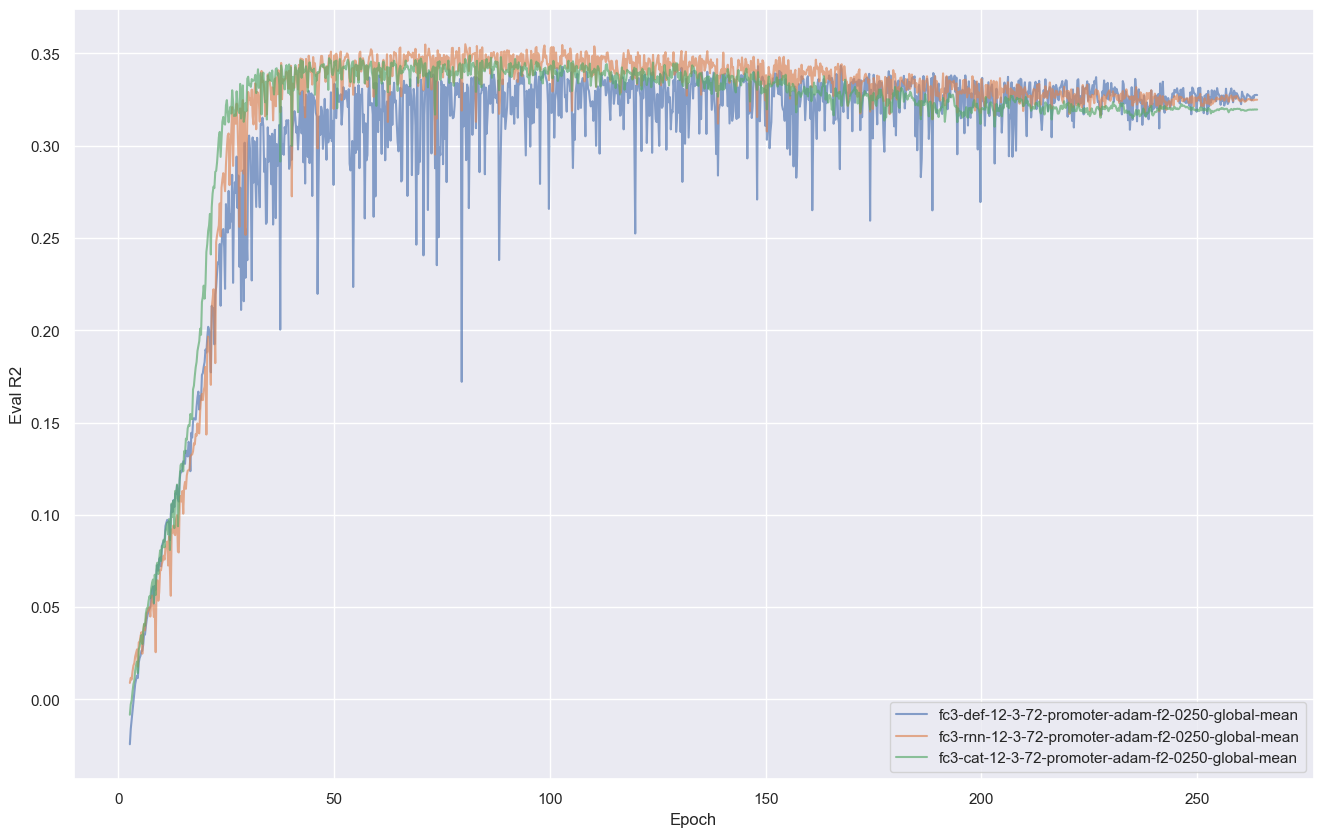

In [21]:
# Plot

report_plot.models_bert_r2(
	data = report_filter.filter_bert_reports(
		reports = report_bert_model,
		keep_only = ['12'],
		drop_only = ['lamb', '6-00']
	),
	mode     = 'regression',
	x        = 12,
	y        = None,
	filename = None,
	step     = 'epoch'
)

In [22]:
# Concat reports and display top few

report = report_concat.concat_bert_reports(
	data      = report_bert_model,
	mode      = 'regression',
	metric    = 'eval_r2',
	ascending = False
)

if report is not None :
	report = report.head(n = 25)

report

,Mode,Arch,Type,Layer,Kmer,Feature,Filter,Sequence,Optimizer,Epochs,Target0,Target1,Target2,Eval_R2,Eval_ME,Eval_MAPE,Eval_MAE,Learning_Rate,Step,Epoch
1,regression,fc3,rnn,12,3,72,f2,promoter,adam,250,global,mean,None,0.355006959,2.719701300,1.369553700,0.592633370,0.000038628,39000,80
2,regression,fc3,cat,12,3,72,f2,promoter,adam,250,global,mean,None,0.348880257,2.965041900,1.334449800,0.596538660,0.000038411,39500,81
0,regression,fc3,def,12,3,72,f2,promoter,adam,250,global,mean,None,0.343323016,2.827306000,1.314018700,0.597441400,0.000020312,81200,167
